Модель 1 (на основе количества задач):
Средняя продолжительность: 4.17 недель
80% достоверность: 5.00 недель

Модель 2 (на основе человеко-часов):
Средняя продолжительность: 5.07 недель
80% достоверность: 5.00 недель


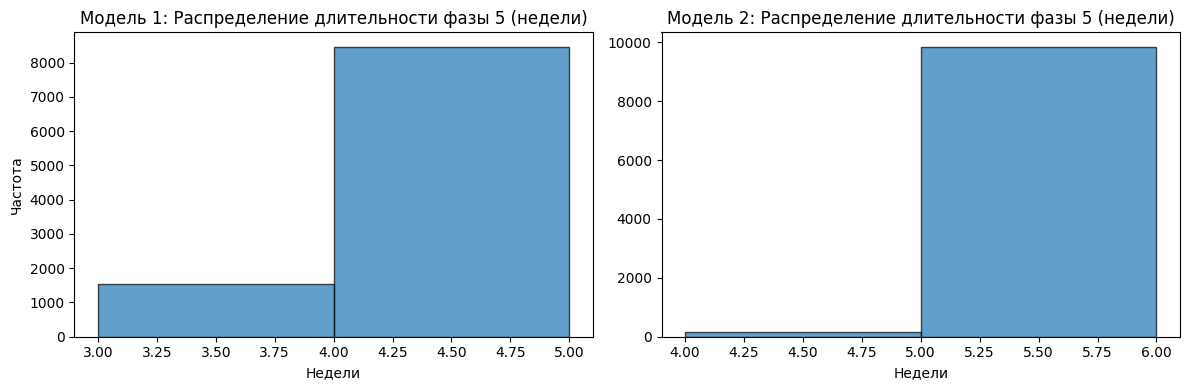

In [2]:
import numpy as np
import pandas as pd

weekly_tasks_history = [6, 11, 5, 6]

weekly_hours_history = [25, 30, 35, 30]

total_tasks_phase5 = 25

tasks_estimates = {
    'T5.1': (4, 6, 8),
    'T5.2': (2, 3, 5),
    'T5.3': (3, 4, 6),
    'T5.4': (1, 2, 3),
    'T5.5': (2, 3, 5),
    'T5.6': (6, 8, 12),
    'T5.7': (3, 4, 6),
    'T5.8': (2, 3, 4),
    'T5.9': (4, 6, 8),
    'T5.10': (6, 8, 10),
    'T5.11': (4, 6, 8),
    'T5.12': (5, 7, 10),
    'T5.13': (4, 6, 8),
    'T5.14': (6, 8, 12),
    'T5.15': (4, 6, 8),
    'T5.16': (3, 4, 6),
    'T5.17': (2, 3, 5),
    'T5.18': (4, 6, 8),
    'T5.19': (5, 7, 10),
    'T5.20': (8, 10, 16),
    'T5.21': (4, 6, 8),
    'T5.22': (3, 5, 7),
    'T5.23': (2, 3, 5),
    'T5.24': (3, 4, 6),
    'T5.25': (2, 3, 5)
}

np.random.seed(42)
n_sim = 10000
durations_model1 = []

for _ in range(n_sim):
    weeks = 0
    tasks_done = 0
    while tasks_done < total_tasks_phase5:
        tasks_this_week = np.random.choice(weekly_tasks_history)
        tasks_done += tasks_this_week
        weeks += 1
    durations_model1.append(weeks)

durations_model2 = []

for _ in range(n_sim):
    total_hours = 0
    for task, (a, b, c) in tasks_estimates.items():
        hours = np.random.triangular(a, b, c)
        total_hours += hours

    weeks = 0
    cumulative_hours = 0
    while cumulative_hours < total_hours:
        hours_this_week = np.random.choice(weekly_hours_history)
        cumulative_hours += hours_this_week
        weeks += 1
    durations_model2.append(weeks)

model1_80 = np.percentile(durations_model1, 80)
model2_80 = np.percentile(durations_model2, 80)

print("Модель 1 (на основе количества задач):")
print(f"Средняя продолжительность: {np.mean(durations_model1):.2f} недель")
print(f"80% достоверность: {model1_80:.2f} недель")

print("\nМодель 2 (на основе человеко-часов):")
print(f"Средняя продолжительность: {np.mean(durations_model2):.2f} недель")
print(f"80% достоверность: {model2_80:.2f} недель")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(durations_model1, bins=range(min(durations_model1), max(durations_model1)+1), edgecolor='black', alpha=0.7)
axes[0].set_title('Модель 1: Распределение длительности фазы 5 (недели)')
axes[0].set_xlabel('Недели')
axes[0].set_ylabel('Частота')

axes[1].hist(durations_model2, bins=range(min(durations_model2), max(durations_model2)+1), edgecolor='black', alpha=0.7)
axes[1].set_title('Модель 2: Распределение длительности фазы 5 (недели)')
axes[1].set_xlabel('Недели')

plt.tight_layout()
plt.show()